<a href="https://colab.research.google.com/github/persival-iania/AI-For-Beginners/blob/main/Persival%20-%20Regressa%CC%83o_Linear_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

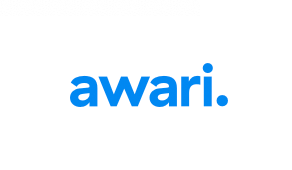


In [ ]:
# importar pacotes necessários
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Esse comando serve para plotar os gráficos estáticos logo abaixo da célula, 
#existem outras configurações do %matplolib que podem mostrar os gráficos em outras abas ou gráficos dinâmicos.

AWARI 

Regressão linear



# Como Implementar Regressão Linear com Python?


O campo de *Machine Learning* oferece tantas opções de algoritmos que é muito difícil alguém conhecer todos e se manter atualizado a cada dia.

A escolha do algoritmo correto tem um enorme impacto na qualidade da solução, por isso é importante não apenas usar uma biblioteca pronta (sem ter a mínima ideia do que está por trás), mas ter pelo menos uma noção da teoria por trás dos modelos e algoritmos que você implementa.

Uma das primeiras técnicas que a(o) cientista de dados costuma ter contato no começo dos seus estudos é a Análise de Regressão, onde aprende a implementar um modelo de Regressão Linear Simples.

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/linha_regressao.gif?raw=1" width="400"/>

Entretanto, muita gente acaba apenas decorando como usar o ```scikit-learn``` e nunca mais vais atrás do conceito estatístico que está por trás da Regressão Linear.

Este notebook traz uma conceituação um pouco mais aprofundada que o normal, porém sem exagerar em formalidade/rigor matemático. O objetivo é apenas convidar você a despertar esse lado curioso pelas coisas que implementamos no dia-a-dia, afinal é isso que vai te destacar da média.

O objetivo é apenas convidar você a despertar esse lado curioso pelas coisas que implementamos no dia-a-dia, afinal é isso que vai te destacar da média.

## O que é Análise de Regressão?

O objetivo da análise de regressão é explorar o relacionamento existente entre duas ou mais variáveis, visando obter informações sobre uma delas a partir dos valores conhecidas das outras.


A análise de regressão busca entender o relacionamento entre variáveis, e esse relacionamento pode ser representado por uma equação matemática. 

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/regressao_linear_ex.png?raw=1" alt="Regressão Linear" width="300"/>

Vamos supor que você queira saber o preço de venda de uma casa sua e acredita que existe um relacionamento entre as variáveis que você está considerando (área construída, número de quartos e localização) com o preço que você pode pedir nela.

Seria possível fazer uma análise de regressão, baseado nas outras casas da cidade para estimar o preço de venda da sua, após obter os pesos para os parâmetros em um modelo de Machine Learning.

### Relação não determinística

Um ponto importante mas muito desconhecido é que nos nossos problemas do cotidiano, muitas variáveis x e y aparentam estar relacionadas uma com a outra, porém **de maneira não determinística**.

Uma relação determínistica, por exemplo, é quando  queremos saber a distância percorrida por um carro, mantendo velocidade constante $v$ ao longo de $\Delta t$ segundos. Nesse exemplo, sabemos que a distância percorrida será $\Delta s = v * \Delta t$, pois as variáveis estão relacionadas deterministicamente.

Um exemplo de variáveis relacionadas de maneira não determinística é se quisessemos saber $y = \text{tamanho do vocabulário de uma criança}$ sendo $x = \text{idade dessa criança}$.

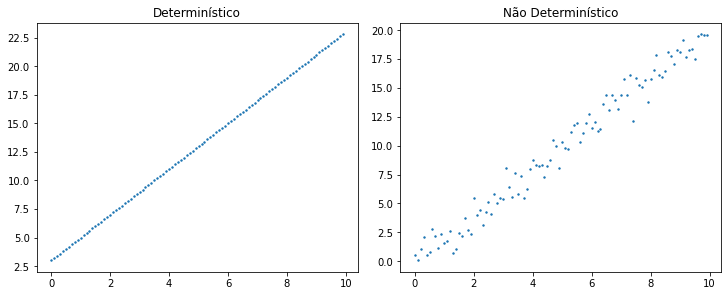

In [ ]:
# exemplo de plots determinísticos
np.random.seed(42) 
det_x = np.arange(0,10,0.1) 

det_y = 2 * det_x + 3

# exemplo de plots não determinísticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# plotar determinísticos vs. não determinísticos
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].scatter(det_x, det_y, s=2)
axs[0].set_title("Determinístico")

axs[1].scatter(non_det_x, non_det_y, s=2)
axs[1].set_title("Não Determinístico")

plt.show()

Olhando rapidamente você já consegue ver uma diferença importante, que apesar dos dois gráficos estarem mostrando pontos que se espalham sobre uma “reta virtual”, um deles não segue um padrão exato, determinístico. Parece que há algum tipo de aleatoriedade envolvida.

Ou seja, nos modelos de Regressão Linear que usamos em Machine Learning, não temos uma relação perfeita entre as variáveis, pois as observações do dataset não cabem exatamente em uma reta.

Isso significa que temos um modelo probabilístico, que captura a aleatoriedade que é inerente de qualquer processo do mundo real.

Pense, você consegue traçar uma reta pegando todos os pontos no gráfico da esquerda? E consegue traçar uma reta pegando todos os pontos no gráfico da direita?

Voltando para aquele exemplo de vender sua casa, basta imaginar que seu vizinho tem uma casa do mesmo tamanho, mesmo número de quartos, mesma localização, porém elas dificilmente teriam o mesmo preço exato.

## O modelo de regressão linear simples

Para representar a relação entre uma variável dependente ($y$) e uma variável independente ($x$), usamos o modelo

$$y = \beta_0 + \beta_1 x + \varepsilon$$

que determina uma linha reta com inclinação $\beta_1$ e intercepto $\beta_0$, com a variável aleatória (erro) $\varepsilon$, considerada normalmente distribuída com $E(\varepsilon) = 0$ e $V(\varepsilon) = \sigma^2$.

Para simplificar, vamos assumir a premissa de que o valor médio da variável $\varepsilon$ para um dado valor de $x$ é $0$. Dessa maneira, a equação da seguinte forma:

$$y = \beta_0 + \beta_1 x$$

Quando a gente implementa um modelo de Regressão Linear com o ```scikit-learn```, a gente quer encontrar os valores dos parâmetros $\beta_0$ e $\beta_1$ que melhor representam o relacionamento entre as variáveis.

Antes de você chamar o ```fit()``` do seu modelo, $\beta_0$ e $\beta_1$ são parâmetros totalmente desconhecidos. 

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/retas_regressao_linear.png?raw=1" width="300"/>

Olhando no gráfico acima, você é capaz de dizer qual reta seria mais plausível?

Parece óbvio que é a reta verde, porém não seria possível essa análise visual caso tivessemos centenas de variáveis. E também temos um problema, o computador não consegue "olhar" para ver qual reta fica melhor.

A questão é, como encontrar boas estimativas de $\beta_0$ e $\beta_1$ para que nosso modelo forneca boas estimativas?

*Se até agora tudo ainda está confuso para você e você não consegue enxergar uma reta na equação acima, eu aconselho você [revisar a equação fundamental da reta](https://pt.khanacademy.org/math/algebra/two-var-linear-equations/point-slope/v/idea-behind-point-slope-form), que ficou esquecida na sua cabeça desde a época de ensino médio.*

### Estimando os parâmetros de Modelo

De acordo com [Devore](https://www.amazon.com.br/Probabilidade-estat%C3%ADstica-para-engenharia-ciências/dp/8522111839/ref=sr_1_1?__mk_pt_BR=ÅMÅŽÕÑ&keywords=devore&qid=1564349463&s=gateway&sr=8-1), um método usado para verificar se uma reta oferece um bom ajuste aos dados é o **Método dos Mínimos Quadrados**.

De acordo com esse método, o desvio vertical do ponto $(x_i, y_i)$ da reta $y=\beta_0 + \beta_1x$ é:

$$\text{altura do ponto} - \text{altura da reta} = y_i = (\beta_0 + \beta_1 x_i)$$

A soma dos quadrados de tais desvios verticais dos pontos $(x_1, y_1), \dots, (x_n, y_n)$ à reta é, portanto,

$$f(\beta_0, \beta_1) = \sum_{i=1}^{n}[y_i - (\beta_0 + \beta_1x_i)]^2$$

Uma reta é razoável se as distâncias verticais (desvios) dos pontos analisados em relação à reta são pequenas.

<img src="https://github.com/omnijus-persival/sigmoidal_ai/blob/master/img/desvios_reta.png?raw=1" width="400"/>

Ou seja, a reta que tem o melhor ajuste possível é aquela na qual se tem a menor soma possível de desvios quadrados.

Os valores de minimização $\beta_0$ e $\beta_1$ são encontrados quando se resolvem as derivadas parciais abaixo, igualando-as a $0$.

$$\frac{\partial f(\beta_0, \beta_1)}{\partial \beta_0} = \sum 2(y_i - \beta_0 - \beta_1 x_i)(-1) = 0$$

e

$$\frac{\partial f(\beta_0, \beta_1)}{\partial \beta_1} = \sum 2(y_i - \beta_0 - \beta_1 x_i)(-x_i) = 0$$

Essa etapa requer um conhecimento mais avançado de cálculo, e eu não vou entrar em mais detalhes. Tudo que você precisa saber é que a cada iteração do algoritmo a gente espera encontrar a menor soma possível de desvios quadrados.

## Implementando Regressão Linear com Python

Para ver na prática uma aplicação simples e direta da Regressão Linear, vamos usar as variáveis que plotamos lá em cima, ```non_det_x``` e ```non_det_y```.

Lembrando que aqui eu estou ignorando completamente as etapas de split entre datasets de treino e teste ou qualquer outro tipo de etapa. O objetivo é apenas encontrar uma reta com um fit ideal aos nossos pontos.

In [ ]:
# importar os pacotes necessários
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Como temos apenas uma variável, nosso ```x``` é um vetor (1 dimensão).

Após minimizar a função custo e encontrar o melhor *fit* os parâmetros da equação da reta que buscamos estarão armazenados como atributos de ```lm_model```, onde $\beta_0 = \text{intercept_}$ e $\beta_1 = \text{coef_}$.

Imprimindo esses parâmetros a gente vê quais valores numéricos melhor representam nossa reta para o modelo de Regressão Linear:

In [ ]:
# criar modelo linear e otimizar
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)

# extrair coeficientes
slope = lm_model.coef_
intercept = lm_model.intercept_

In [ ]:
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-0.17281285407737457
b1: 	2.0139325932693497


E agora vamos plotar a reta, com os valores de parâmetros obtidos, sobreponde ela aos pontos e ver como essa solução parece plausível visualmente.

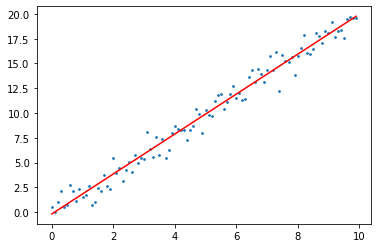

In [ ]:
# plotar pontos e retas com parâmetros otimizados
plt.scatter(non_det_x, non_det_y, s=3)
plt.plot(non_det_x, (non_det_x * slope + intercept), color='r')

plt.show()

E é isso! Essa solução parece de fato atender o nosso problema.

Agora você sabe não apenas implementar uma Regressão Linear, que é feito com pouquíssimas linhas de código, mas consegue entender a lógica por trás do código :)

## Resumo

Eu aposto que agora você conseguiu entender o funcionamento básico de um modelo de Regressão Linear, vendo tanto visualmente (como a reta vai “melhorando” a cada iteração) quanto absorvendo conceitos (com a matemática que foi exposta).

Este artigo foi muito mais teórico que aplicação de técnicas de Data Science ou Machine Learning, e tudo isso propositalmente. Ao limitar para uma variável, conseguimos realizar os plots em 2 dimensões  e acompanhar mais facilmente tudo.

Obviamente, todo essa teoria pode ser extrapolada para problemas mais complexos envolvendo múltiplas variáveis. A lógica é a mesma!

Tenha sempre consciência da importância de ir além da pura e simples aplicação de código. Faça isso para Redes Neurais, Regressão Logística, XGBoost, mas nunca aceite sem entender.

Lembre-se que o que vai te diferenciar das outras pessoas, da média, é o conceito que você sabe a mais e a criatividade para pensar em soluções fora-da-caixa. 